In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

In [3]:
df_oneday = pd.read_csv("관광_당일여행_동반자_유형__중복응답__20240520014137.csv", encoding='utf-8')
df_moreday = pd.read_csv("관광_숙박여행_동반자_유형__중복응답__20240520014059.csv", encoding='utf-8')

In [4]:
#연령대별, 성별, 직업별, 숙박/당일 동반 유형 분포 (2019-2022)

## 당일여행 동반자 유형 분석

### 기본 데이터

In [5]:
df_oneday

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
0,2019,전체,소계,49.6,41.7,6.6,2.2,2.0,0.3,0.3
1,2019,성별,남자,51.0,40.8,6.0,2.7,2.0,0.4,0.3
2,2019,성별,여자,48.3,42.5,7.2,1.7,2.1,0.2,0.3
3,2019,연령,15~19세,34.9,58.8,1.3,0.2,1.5,4.4,0.2
4,2019,연령,20대,16.6,80.7,0.7,1.7,0.7,0.2,0
...,...,...,...,...,...,...,...,...,...,...
119,2022,가구소득,200~300만원 미만,44.1,48.9,5.2,2.6,2.3,0.1,-
120,2022,가구소득,300~400만원 미만,55.7,40.2,3.2,2.2,1.5,-,-
121,2022,가구소득,400~500만원 미만,59.6,37.1,2.3,2,1.2,0.4,-
122,2022,가구소득,500~600만원 미만,55.8,42.1,1.6,1.7,1.1,0.1,-


In [6]:
df_oneday["통계분류(1)"].unique()

array(['전체', '성별', '연령', '직업', '학력', '가구원수', '가구소득'], dtype=object)

In [7]:
df_oneday["통계분류(2)"].unique()

array(['소계', '남자', '여자', '15~19세', '20대', '30대', '40대', '50대', '60대',
       '70세 이상', '임금봉급근로자', '고용원있는사업주', '고용원없는자영업자', '무급가족 종사자', '전업주부',
       '학생', '기타', '초졸 이하', '중학교', '고등학교', '대학교이상', '1인', '2인', '3인이상',
       '100만원 미만', '100~200만원 미만', '200~300만원 미만', '300~400만원 미만',
       '400~500만원 미만', '500~600만원 미만', '600만원 이상'], dtype=object)

In [8]:
df_oneday['시점'] = df_oneday['시점'].astype(str)
df_oneday.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친목 단체/모임(동호회 종교단체 등)    float64
(직장)동료                   object
친척                      float64
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

### 연령대별 동반자 유형 분석

In [9]:
df_age = df_oneday[df_oneday["통계분류(1)"]=="연령"]
df_age.head()

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
3,2019,연령,15~19세,34.9,58.8,1.3,0.2,1.5,4.4,0.2
4,2019,연령,20대,16.6,80.7,0.7,1.7,0.7,0.2,0
5,2019,연령,30대,58.2,39.1,0.8,2.2,0.9,-,0.1
6,2019,연령,40대,66.0,27.1,3.0,3.8,2.0,0.1,0.5
7,2019,연령,50대,54.0,34.2,10.3,3,2.6,-,0.2


In [29]:
df_twenty = df_age[(df_age["통계분류(2)"]=="20대")]
df_twenty.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친목 단체/모임(동호회 종교단체 등)    float64
(직장)동료                   object
친척                      float64
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

In [26]:
df_twenty.groupby("통계분류(2)")[['가족(부모 배우자 자녀 형제)',"친구/연인","친목 단체/모임(동호회 종교단체 등)","(직장)동료","친척","학교 단체(소풍 수학여행 등)"]].sum()/4

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [20]:
df_forty = df_age[(df_age["통계분류(2)"]=="40대")]
df_forty = df_forty.loc[:,'가족(부모 배우자 자녀 형제)':]
df_forty = df_forty.T
# df_forty['total'] = (df_forty['6'] + df_forty['37'] + df_forty['68'] + df_forty['99'])/4
df_forty

,6,37,68,99
가족(부모 배우자 자녀 형제),66.0,69.1,73.7,73.0
친구/연인,27.1,24.5,22.2,23.1
친목 단체/모임(동호회 종교단체 등),3.0,2.4,1.1,2.0
(직장)동료,3.8,4.7,3.8,3.1
친척,2.0,1.9,1.5,1.3
학교 단체(소풍 수학여행 등),0.1,-,-,-
기타,0.5,0.1,-,-


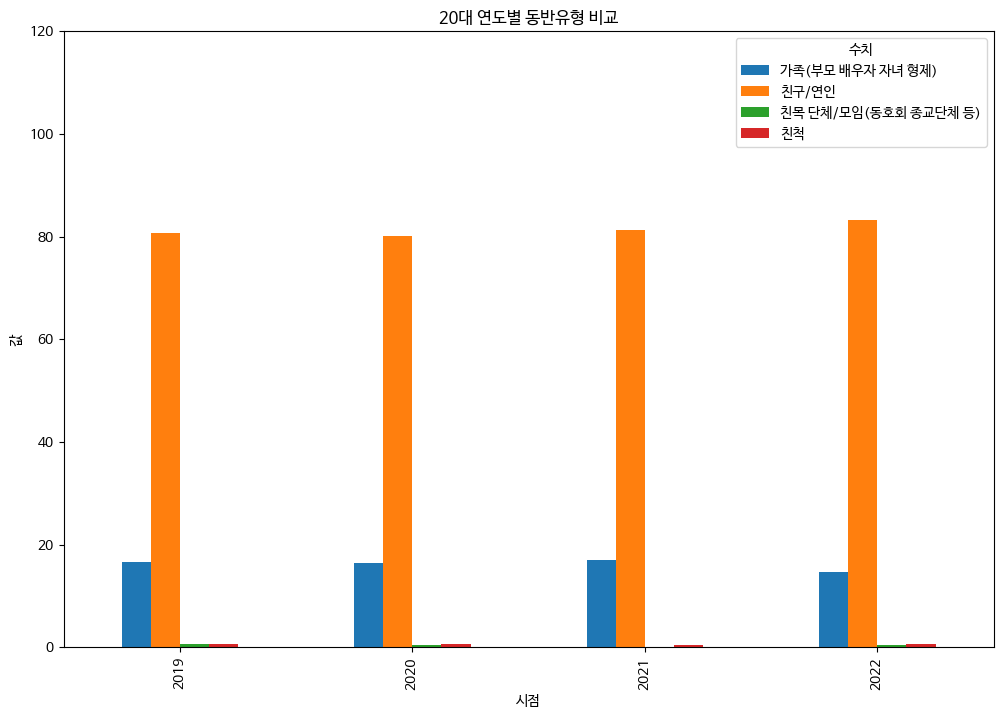

In [12]:
df_twenty_combined = df_twenty.groupby('시점').sum()

# 그래프 그리기
df_twenty_combined.plot(kind='bar', figsize=(12, 8))
plt.title('20대 연도별 동반유형 비교')
plt.xlabel('시점')
plt.ylabel('값')
plt.ylim(0, 120)  # y축 범위 조정
plt.legend(title='수치')  # 범례 추가

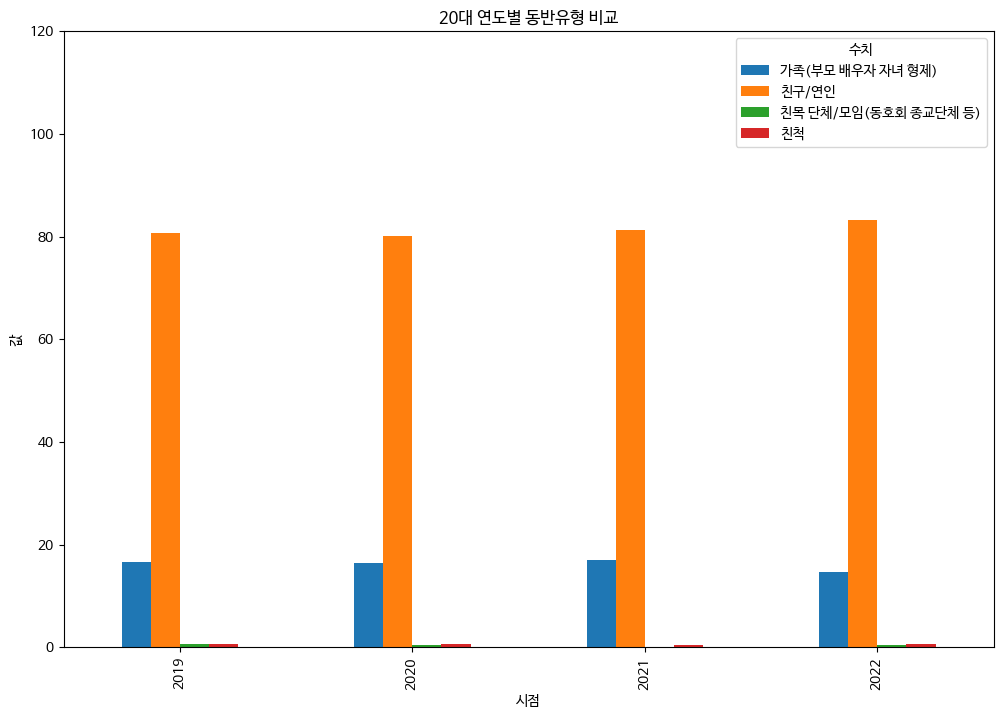

In [13]:
df_forty_combined = df_twenty.groupby('시점').sum()

# 그래프 그리기
df_forty_combined.plot(kind='bar', figsize=(12, 8))
plt.title('20대 연도별 동반유형 비교')
plt.xlabel('시점')
plt.ylabel('값')
plt.ylim(0, 120)  # y축 범위 조정
plt.legend(title='수치')  # 범례 추가